# TP0

## Integrantes
- Arian Saggase
- Ariel Alejandro Amadio
- Juan Felipe Perdomo Rojas
- Juan Luis Barberia

In [20]:
# Add ".."" to path to find the src module
import os
import sys
sys.path.append("..")

# import packages
from itertools import product
import json 
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from src.catching import attempt_catch
from src.pokemon import PokemonFactory, StatusEffect

# Constantes
POKEMONES = ["jolteon", "caterpie", "snorlax", "onix", "mewtwo"]
POKEBOLAS = ["pokeball", "ultraball", "fastball", "heavyball"]
ESTADOS = ["NONE", "SLEEP", "FREEZE", "POISON", "BURN", "PARALYSIS"]

pokemon_factory = PokemonFactory("../pokemon.json")

## 1.A.

Ejecutando la función 100 veces, para cada Pokemon en condiciones ideales (HP:100 %, LVL 100) ¿Cuál es la probabilidad de captura promedio para cada pokebola?




Probabilidad de Captura promedio por pokebola
---------------------------------------------
pokebola  pokeball  ultraball  fastball  heavyball
pokemon                                           
caterpie      0.29       0.61      0.33       0.30
jolteon       0.05       0.14      0.23       0.02
mewtwo        0.00       0.01      0.01       0.00
onix          0.07       0.11      0.04       0.06
snorlax       0.03       0.09      0.02       0.08


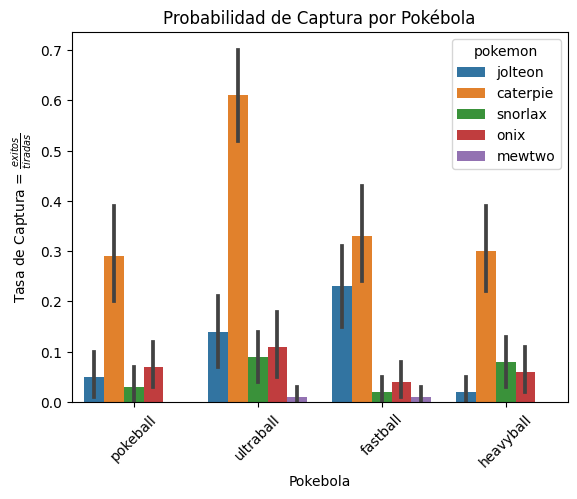

In [21]:
hp = 1.0
lvl = 1.0

results = []
for pokemon_name, pokebola in product(POKEMONES, POKEBOLAS):
    for _ in range(100):
        pokemon = pokemon_factory.create(pokemon_name, lvl, StatusEffect.NONE, hp)
        attempt_success, capture_rate = attempt_catch(pokemon, pokebola, noise=0.0)
        results.append({
            "pokemon": pokemon.name,
            "pokebola": pokebola,
            "attempt_success": attempt_success,
            "capture_rate": capture_rate,
        })

df_results = pd.DataFrame(results)
results_per_pokemon = df_results.pivot_table(index="pokemon", columns="pokebola",
                                              values="attempt_success", aggfunc="mean")
print("Probabilidad de Captura promedio por pokebola")
print("---------------------------------------------")
print(results_per_pokemon[POKEBOLAS])

sns.barplot(x="pokebola", y="attempt_success", hue="pokemon",
            data=df_results, errorbar="ci")

plt.xlabel("Pokebola")
plt.ylabel("Tasa de Captura = $\\frac{exitos}{tiradas}$")
plt.title("Probabilidad de Captura por Pokébola")
plt.xticks(rotation=45)
plt.show()

## 1.B.

¿Es cierto que algunas pokebolas son más o menos efectivas dependiendo de propiedades intrínsecas de cada Pokemon? Justiﬁcar.
Sugerencia: Comparar efectividad (success/total attemps) como proporción de la efectividad de la Pokebola básica para cada Pokemon

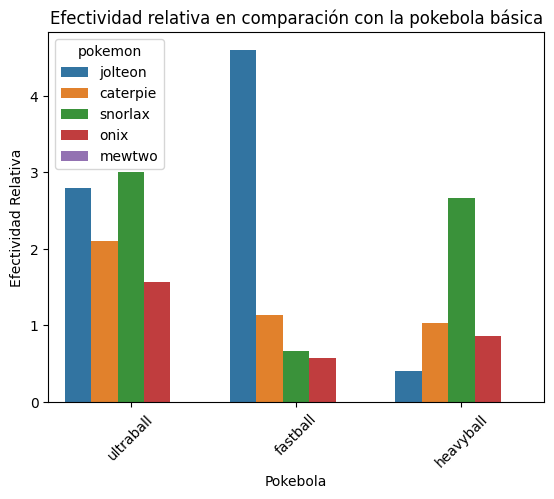

In [22]:
df_results["relative_success"] = df_results["attempt_success"] / [results_per_pokemon["pokeball"][row.pokemon] for i, row in df_results.iterrows()]
sns.barplot(x="pokebola", y="relative_success", hue="pokemon",
            data=df_results[df_results.pokebola != "pokeball"], errorbar=None)

plt.xlabel("Pokebola")
plt.ylabel("Efectividad Relativa")
plt.title("Efectividad relativa en comparación con la pokebola básica")
plt.xticks(rotation=45)
plt.show()

La **efectividad relativa** de una pokebola \( B \) en comparación con la **pokebola básica** se define como:

$Efectividad Relativa (B) = \frac{\text{Success Rate} (B)}{\text{Success Rate} (\text{Pokeball})}$

**Ejemplo de cálculo para Caterpie con Ultraball**
- Success Rate con Pokeball = 0.29
- Success Rate con Ultraball = 0.68

Aplicamos la ecuación:

$Efectividad Relativa (Ultraball) = \frac{0.68}{0.29} = 2.34$

**Ejemplo de cálculo para Caterpie con Fastball**
- Success Rate con Pokeball = 0.29
- Success Rate con Fastball = 0.36

$Efectividad Relativa(Fastball) = \frac{0.36}{0.29} = 1.24$

Estos cálculos demuestran cómo la efectividad varía en función del tipo de pokebola.

- Fastball es altamente efectiva en Jolteon. Jolteon es un Pokémon rápido, lo que coincide con la mecánica de la Fastball, que tiene mayor éxito en Pokémon veloces.

- Heavyball es más efectiva en Onix. Onix es un Pokémon muy pesado, y la Heavyball tiene bonificaciones según el peso, lo que explica esta mejora.

- Ultraball es consistentemente más efectiva que la Pokeball para todos los Pokémon. En promedio, duplica la tasa de éxito, lo cual es esperado ya que tiene una bonificación general.

- Heavyball es inefectiva en Jolteon. Esto se debe a que Jolteon es un Pokémon liviano y la Heavyball no le da ninguna bonificación. 

- Mewtwo es extremadamente difícil de atrapar con cualquier pokebola.


## 2.A.

¿Las condiciones de salud tienen algún efecto sobre la efectividad de la captura? Si es así, ¿Cual es más o menos efectiva?

Para resolverlo se ejecutó una función iterativa de captura que evalua $N$ tiradas de pokebolas a los distintos pokemones que atravisan $M$ estados de salud.


status              BURN  FREEZE  NONE  PARALYSIS  POISON  SLEEP
pokemon  pokebola                                               
caterpie fastball   0.37    0.67  0.29       0.47    0.58   0.67
         heavyball  0.44    0.74  0.30       0.40    0.40   0.58
         pokeball   0.56    0.65  0.34       0.51    0.38   0.66
         ultraball  0.99    1.00  0.67       1.00    1.00   1.00
jolteon  fastball   0.33    0.45  0.19       0.31    0.42   0.45
         heavyball  0.05    0.04  0.04       0.05    0.04   0.07
         pokeball   0.09    0.17  0.08       0.07    0.06   0.13
         ultraball  0.19    0.20  0.11       0.14    0.15   0.21
mewtwo   fastball   0.03    0.03  0.02       0.06    0.00   0.06
         heavyball  0.00    0.01  0.01       0.00    0.00   0.00
         pokeball   0.01    0.00  0.00       0.00    0.02   0.00
         ultraball  0.01    0.04  0.01       0.00    0.01   0.03
onix     fastball   0.10    0.11  0.07       0.06    0.05   0.08
         heavyball  0.17 

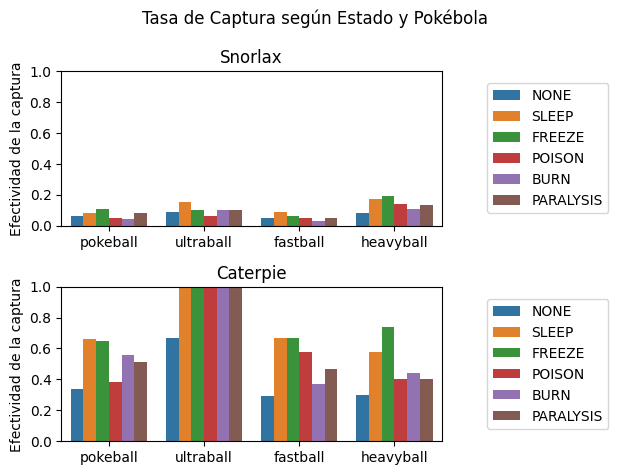

In [23]:
hp = 1.0
lvl = 1.0

results = []
for pokemon_name, pokebola, estado in product(POKEMONES, POKEBOLAS, ESTADOS):
    for _ in range(100):
        pokemon = pokemon_factory.create(pokemon_name, lvl, StatusEffect[estado], hp)
        attempt_success, capture_rate = attempt_catch(pokemon, pokebola, noise=0.0)
        results.append({
            "pokemon": pokemon.name,
            "pokebola": pokebola,
            "attempt_success": attempt_success,
            "capture_rate": capture_rate,
            "status": estado,
        })

results = pd.DataFrame(results)
pivot = results.pivot_table(index=["pokemon", "pokebola"], columns="status", values="attempt_success", aggfunc="mean")
print(pivot)

df_snorlax = results[results["pokemon"] == "snorlax"]
df_caterpie = results[results["pokemon"] == "caterpie"]

fig, axis = plt.subplots(2, 1)
sns.barplot(x="pokebola", y="attempt_success", hue="status", data=df_snorlax, errorbar=None, ax=axis[0])
axis[0].set_title("Snorlax")
axis[0].legend(loc="center left", bbox_to_anchor=(1.1, 0.5))
axis[0].set_ylim((0, 1))
axis[0].set_ylabel("Efectividad de la captura")
axis[0].set_xlabel("")

sns.barplot(x="pokebola", y="attempt_success", hue="status", data=df_caterpie, errorbar=None, ax=axis[1])
axis[1].set_title("Caterpie")
axis[1].legend(loc="center left", bbox_to_anchor=(1.1, 0.5))
axis[1].set_ylim((0, 1))
axis[1].set_ylabel("Efectividad de la captura")
axis[1].set_xlabel("")

plt.suptitle("Tasa de Captura según Estado y Pokébola")
plt.tight_layout()
plt.show()


En función de la respuesta del gráfico (realizada para dos de los pokemones, Snorlax y Caterpie) es posible analizar que dependiendo del estado del pokemon las pokebolas poseen distinto grado de efectivida o tasa de éxito.

## 2.B.

¿Cómo afectan los puntos de vida a la efectividad de la captura?

Sugerencia: Elegir uno o dos Pokémon y, manteniendo el resto de los parámetros constantes, calcular la probabilidad de captura para distintos % de HP.

Se evalua en un rango de decenas desde 10 a 100 (en porcentaje de HP) como varían las propiedades de las pokebolas

hp                   0.0   0.2   0.4   0.6   0.8   1.0
pokemon  pokebola                                     
caterpie fastball   0.96  0.91  0.78  0.70  0.61  0.35
         heavyball  0.83  0.83  0.71  0.52  0.59  0.33
         pokeball   0.95  0.88  0.71  0.73  0.42  0.32
         ultraball  1.00  1.00  1.00  1.00  1.00  0.63
jolteon  fastball   0.66  0.67  0.60  0.40  0.31  0.27
         heavyball  0.09  0.07  0.08  0.13  0.03  0.03
         pokeball   0.17  0.11  0.18  0.12  0.10  0.03
         ultraball  0.30  0.36  0.24  0.19  0.18  0.10
mewtwo   fastball   0.02  0.06  0.03  0.03  0.02  0.02
         heavyball  0.00  0.01  0.00  0.01  0.02  0.00
         pokeball   0.01  0.00  0.02  0.02  0.00  0.00
         ultraball  0.02  0.01  0.02  0.02  0.01  0.00
onix     fastball   0.09  0.13  0.10  0.08  0.10  0.05
         heavyball  0.23  0.23  0.18  0.14  0.10  0.04
         pokeball   0.14  0.13  0.18  0.10  0.05  0.08
         ultraball  0.29  0.30  0.26  0.17  0.16  0.14
snorlax  f

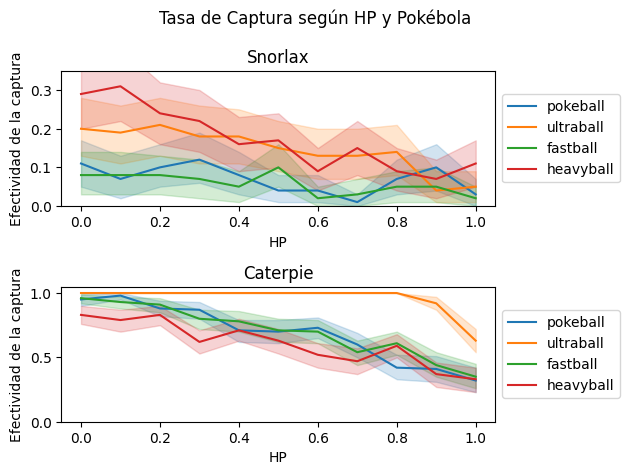

In [24]:
hp_array = np.linspace(0, 1, num=11, endpoint=True)
lvl = 1.0

results = []
for pokemon_name, pokebola, hp in product(POKEMONES, POKEBOLAS, hp_array):
    for _ in range(100):
        pokemon = pokemon_factory.create(pokemon_name, lvl, StatusEffect.NONE, hp)
        attempt_success, capture_rate = attempt_catch(pokemon, pokebola, noise=0.0)
        results.append({
            "pokemon": pokemon.name,
            "pokebola": pokebola,
            "attempt_success": attempt_success,
            "capture_rate": capture_rate,
            "hp": hp,
        })

results = pd.DataFrame(results)
pivot = results.pivot_table(index=["pokemon", "pokebola"], columns="hp", values="attempt_success", aggfunc="mean")
print(pivot[hp_array[::2]])

df_snorlax = results[results["pokemon"] == "snorlax"]
df_caterpie = results[results["pokemon"] == "caterpie"]

fig, axis = plt.subplots(2, 1)
sns.lineplot(x="hp", y="attempt_success", hue="pokebola", data=df_snorlax, errorbar="ci", ax=axis[0])
axis[0].set_title("Snorlax")
axis[0].legend(loc="center left", bbox_to_anchor=(1.0, 0.5))
axis[0].set_ylim((0, 0.35))
axis[0].set_ylabel("Efectividad de la captura")
axis[0].set_xlabel("HP")

sns.lineplot(x="hp", y="attempt_success", hue="pokebola", data=df_caterpie, errorbar="ci", ax=axis[1])
axis[1].set_title("Caterpie")
axis[1].legend(loc="center left", bbox_to_anchor=(1.0, 0.5))
axis[1].set_ylim((0, 1.05))
axis[1].set_ylabel("Efectividad de la captura")
axis[1].set_xlabel("HP")

plt.suptitle("Tasa de Captura según HP y Pokébola")
plt.tight_layout()
plt.show()


Para cada uno de los gráficos podemos ver que a medida que se aumenta el [HP%] tendemos a una menor efectividad de captura. Esto tiene sentido ya que cuanta más vida tenga el pokemon menos factible será atraparlo con cualquiera de las pokebolas en juego.

## 2.C.

¿Qué parámetros son los que más afectan la probabilidad de captura?

Para saber los parametros que más afectan la probabilidad de captura, se varian los mismos de acuerdo a los posibles valores que puedan tomar.
Luego se gráfica la efectividad de captura de acuerdo a la variación de un unico parametro, agregando las variaciones de los restantes.

Para evitar que los gráficos no se vean correctamente, ya que mewtwo tiene una probabilidad mucho menor que caterpie, se normaliza los datos en función de la tasa de captura máxima para cada pokemon.




In [25]:
hp_array = np.linspace(0.2, 1.0, 5, endpoint=True)
lvl_array = np.linspace(0.2, 1.0, 5, endpoint=True)

results = []
for pokemon_name, pokebola, estado, hp, lvl in product(POKEMONES, POKEBOLAS, ESTADOS, hp_array, lvl_array):
    for _ in range(100):
        pokemon = pokemon_factory.create(pokemon_name, lvl, StatusEffect[estado], hp)
        attempt_success, capture_rate = attempt_catch(pokemon, pokebola, noise=0.0)
        results.append({
            "pokemon": pokemon.name,
            "pokebola": pokebola,
            "attempt_success": attempt_success,
            "capture_rate": capture_rate,
            "status": estado,
            "lvl": lvl,
            "hp": hp,
            "max_hp": pokemon.max_hp,
        })

results = pd.DataFrame(results)
max_capture_rate = results.groupby("pokemon").max()["capture_rate"].to_dict()
results["normalized_capture_rate"] = results["capture_rate"] / results["pokemon"].replace(max_capture_rate)


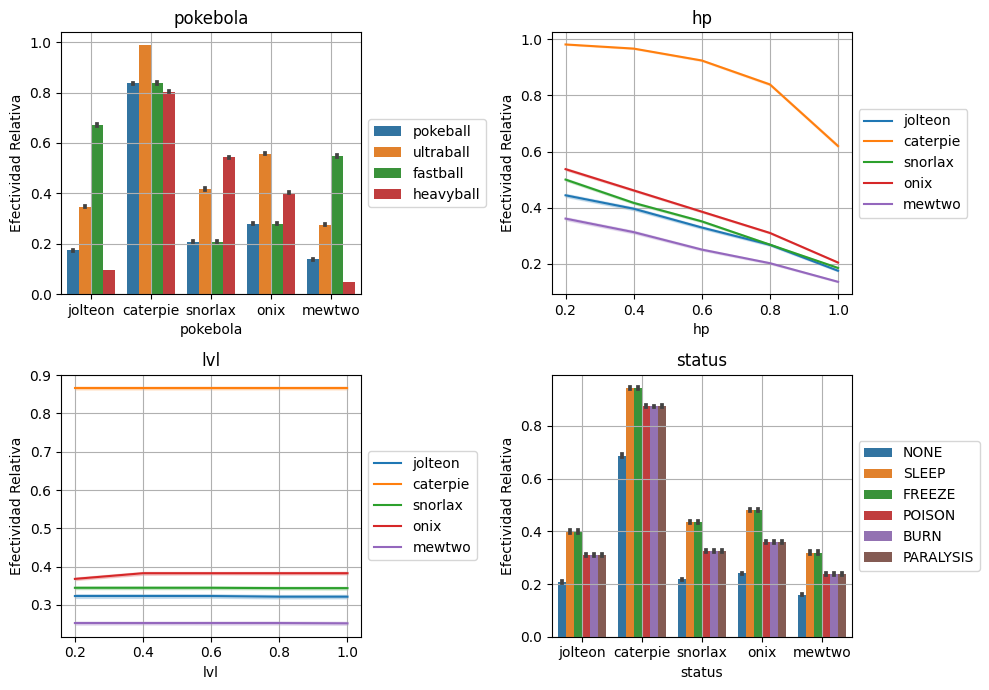

In [26]:
columnas = ["pokebola", "hp", "lvl", "status"]
graficos = ["barplot", "lineplot", "lineplot", "barplot"]

fig, axes = plt.subplots(
    len(columnas) // 2, 2,
    figsize=(10, 7)
)

for i, col in enumerate(columnas):
    if graficos[i] == "barplot":
        sns.barplot(data=results, x='pokemon', y='normalized_capture_rate',
                    hue=col, errorbar="ci", ax=axes[i//2, i%2])
    else:
        sns.lineplot(data=results, x=col, y='normalized_capture_rate',
                     hue='pokemon', errorbar="ci", ax=axes[i//2, i%2])
    axes[i//2, i%2].set_title(col)
    axes[i//2, i%2].set_xlabel(col)
    axes[i//2, i%2].set_ylabel('Efectividad Relativa')
    axes[i//2, i%2].grid()
    axes[i//2, i%2].legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

plt.tight_layout()
plt.show()

Como conclusiones se obtiene que:

- Viendo el gráfico de `pokebola`, la pokebola a usar afecta de diferente forma según el pokemon.
- Viendo el gráfico de `hp`, el hp afecta en gran medida, siendo más dificil atrapar los pokemones con mayor hp.
- Viendo el gráfico de `lvl`, el nivel no afecta en gran medida.
- Viendo el gráfico de `status`, el estado de salud afecta en igual medida a la probabilidad de captura para cada pokemon.

Para cada pokemon en particular se observa que:

- Jolteon: Es más sensible al uso de las diferentes pokebolas
- Caterpie: Es más sensible al % de HP que posee
- Snorlax, Onix, y Mewtwo: No presentan gran sensibilidad pero dependen del % de HP y de la pokebola usada

## 2.D.

Teniendo en cuenta uno o dos pokemones distintos: ¿Qué combinación de condiciones (propiedades mutables) y pokebola conviene utilizar para capturarlos?

Para resolver este punto se utiliza el "todos vs todos" del item anterior, donde se dispone de la variación del nivel de HP, del nivel del pokemon y de su estado para cada una de las pokebolas, intentando obtener la combinación que de la probabilidad máxima de éxito.

In [27]:
agg_results = results.groupby(["pokemon", "pokebola", "hp", "lvl", "status"])["attempt_success"].mean()
for pokemon in POKEMONES:
    df = agg_results[pokemon].T
    combinaciones = set([(ball, status) for (ball, _, _, status) in df[df == df.max()].index.to_numpy()])
    combinaciones = pd.DataFrame(combinaciones)
    combinaciones = combinaciones.sort_values(by=[0, 1])

    print("Las mejores combinaciones para {}, con efectiviad {:.0%}, son:".format(pokemon, df.max()))
    for combinacion in combinaciones.values.tolist():
        print("\t{}\t{}".format(*combinacion))
    print()
    

Las mejores combinaciones para jolteon, con efectiviad 100%, son:
	fastball	FREEZE
	fastball	SLEEP

Las mejores combinaciones para caterpie, con efectiviad 100%, son:
	fastball	BURN
	fastball	FREEZE
	fastball	PARALYSIS
	fastball	POISON
	fastball	SLEEP
	heavyball	BURN
	heavyball	FREEZE
	heavyball	PARALYSIS
	heavyball	POISON
	heavyball	SLEEP
	pokeball	BURN
	pokeball	FREEZE
	pokeball	PARALYSIS
	pokeball	POISON
	pokeball	SLEEP
	ultraball	BURN
	ultraball	FREEZE
	ultraball	NONE
	ultraball	PARALYSIS
	ultraball	POISON
	ultraball	SLEEP

Las mejores combinaciones para snorlax, con efectiviad 53%, son:
	heavyball	SLEEP

Las mejores combinaciones para onix, con efectiviad 70%, son:
	ultraball	FREEZE

Las mejores combinaciones para mewtwo, con efectiviad 14%, son:
	fastball	FREEZE



Podemos ver del resultado de la simulación que existe una mayor probabilidad a partir de ciertas combinaciones, 

Analicemos el caso para Caterpie, se ve a su vez desprendido de incisos anteriores, que Caterpie es fácil de atrapar por lo que se puede llegar a una eficiencia del 100% con respecto a las tiradas con muchas combinaciones de pokebolas.

En cambio, para Snorlax en su mejor convinación tenemos mayores chances de atraparlo si es que arrojamos una Heavyball cuando esta en estado FREEZE.

## 2.E.

A partir del punto anterior, ¿sería efectiva otra combinación de parámetros teniendo en cuenta un nivel del pokemon más bajo (o más alto)?

Desprendido del inciso 2c es posible ver que para una variación total del nivel desde 0 a 100, la probabilidad de captura no se modifica sustancialmente, por lo que podriamos afirmar que una misma combinación para distintos niveles no aporta a la probabilidad